## Support Vector Regression:

In this section, we do a statistical modelling of the data to predict the California House Price using Support Vector Machine(SVM) regression.

In [13]:
import warnings
warnings.filterwarnings("ignore")
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
from scipy import stats

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.metrics import explained_variance_score
from statsmodels.tools.eval_measures import rmse
from sklearn.svm import SVR 
from sklearn import svm

import statsmodels.api as sm
import statsmodels
import statsmodels.formula.api as smf
import os
import statistics

# pre-processing:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

# import libraries for model validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn import metrics
from sklearn.model_selection import learning_curve
import math
from scipy.stats import pearsonr
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix

In [2]:
data_prepared=pd.read_csv('data_prepared.csv',index_col=0)

In [3]:
data_prepared.head()

,longitude,housing_median_age,population,median_income,median_house_price,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
701,-1.198061,0.267020,-0.830491,1.151046,1.942445,0.838250,-1.012356,-0.681889,-0.015566,-0.353264,-0.384466
830,-1.208044,-1.560516,0.808456,0.408011,0.087910,-0.086579,-0.309506,-0.681889,-0.015566,-0.353264,-0.384466
859,-1.198061,-0.607019,0.659220,0.391588,0.353091,0.029978,-0.533384,-0.681889,-0.015566,-0.353264,-0.384466
860,-1.193070,-1.083767,0.310414,0.973025,0.664202,0.390584,-0.752754,-0.681889,-0.015566,-0.353264,-0.384466
861,-1.203053,-0.686477,0.577096,-0.098681,0.087043,-0.483893,0.610403,-0.681889,-0.015566,-0.353264,-0.384466


In [4]:
# extract further remaining data into numpy array:
X_out=data_prepared.drop(['median_house_price'],axis=1)
y_actual=data_prepared['median_house_price']

In [5]:
# Splitting data:
X_train,X_test,y_train,y_test=train_test_split(X_out,y_actual,test_size=0.20,random_state=101)

In [6]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (10588, 10) and size 105880
X_test shape (2648, 10) and size 26480
y_train shape (10588,) and size 10588
y_test shape (2648,) and size 2648


### Support Vector Machine:

In [8]:
svmr = svm.SVR(kernel="rbf")
C = [1000, 10, 1]
gamma = [0.005, 0.003, 0.001]
epsilon = [0.1, 0.01]
parameters = {"C":C, "gamma":gamma, "epsilon":epsilon}

grid_svmr = GridSearchCV(svmr, parameters, scoring="r2",verbose=1,n_jobs=-1)
grid_svmr.fit(X_train, y_train)
print(grid_svmr.best_score_)
print(grid_svmr.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  2.4min finished


0.6301255618110561
{'C': 1000, 'epsilon': 0.1, 'gamma': 0.005}


In [9]:
# Set best parameters given by GridsearchCV:
SVMR_tuned=svmr = svm.SVR(kernel="rbf",C=1,gamma=0.005,epsilon=0.1)

In [10]:
SVMR_tuned.fit(X_train,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
y_predsvmr_tuned=SVMR_tuned.predict(X_test)

In [14]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predsvmr_tuned))

print("Mean absolute Error: %.2f"% metrics.mean_absolute_error(y_test, y_predsvmr_tuned))

print("Root Mean square Error: %.2f"% np.sqrt(mean_squared_error(y_test, y_predsvmr_tuned)))

print('Test Variance score: %.2f' % r2_score(y_test, y_predsvmr_tuned))
print("Model Score for Training data: {}".format(SVMR_tuned.score(X_train,y_train)))
print("Model Score for Testing data: {}".format(r2_score(y_test,y_predsvmr_tuned)))
print('R2(Cross_Val_Score): ',np.sqrt(cross_val_score(SVMR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')))
print('R2(mean of fold of cross_val_score): ',np.sqrt(cross_val_score(SVMR_tuned,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')).mean())

Mean squared error: 0.24
Mean absolute Error: 0.33
Root Mean square Error: 0.49
Test Variance score: 0.61
Model Score for Training data: 0.596217007033904
Model Score for Testing data: 0.6127936268747207
R2(Cross_Val_Score):  [0.77078079 0.76327917 0.76511067 0.77044916 0.78123326]
R2(mean of fold of cross_val_score):  0.770170608107801


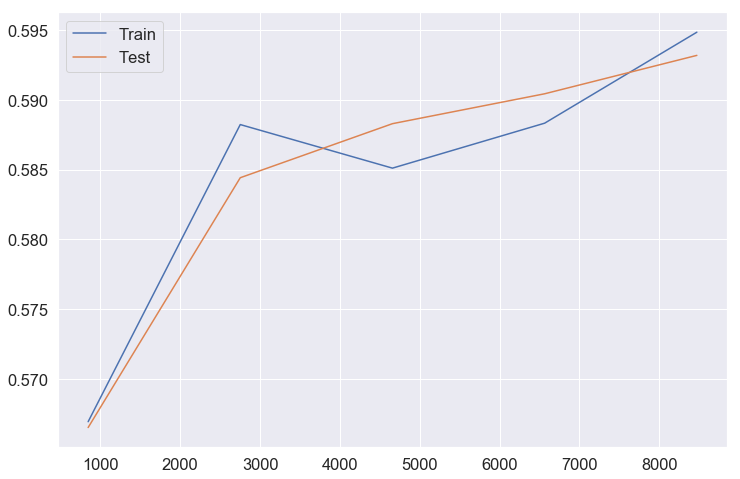

In [16]:
lc=learning_curve(SVMR_tuned,X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score,label='Train')
plt.plot(size,test_score,label="Test")
plt.legend()

We do not see any overfitting in this model but the performance of this model can be improved furthermore.